In [1]:
import numpy as np
import torch
import time
from time import time as timer_start
from Detectors.Deep_Learning.AutoEncoders.utils import SeqDataset,train_epoch,eval_data,train_model,get_cnn_lstm_ae_model,make_train_X,sliding_window_mult_feat
from Detectors.Deep_Learning.AutoEncoders.utils import get_loss_filter_indiv as loss_smooth
from Detectors.Deep_Learning.AutoEncoders.cnn_lstm_ae import CNNRecurrentAutoencoder
import flow.visualize.visualize_ring as visualize_ring
from flow.visualize.visualize_ring import get_measured_leader,get_rel_dist_to_measured_leader,get_vel_of_measured_leader
from copy import deepcopy
import sys
import utils
from utils import assess_relative_model_on_attack
import ray
import os
import csv
from sklearn.metrics import roc_curve,auc

In [2]:
model = get_cnn_lstm_ae_model(n_features=4)
# Load in a trained model:
MODEL_PATH = os.path.join(os.getcwd(),'models/cnn_lstm_ae_i24_detector_complete_obs_ver2.pt')
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu')))


<All keys matched successfully>

In [27]:
sys.path.append('/Users/vanderbilt/Desktop/Research_2022/Usenix_2022/code')
from importlib import reload
import analyze_detector_utils
reload(analyze_detector_utils)
from analyze_detector_utils import sim_attack,sim_attack_with_cut_ins,linear_accel_malicious

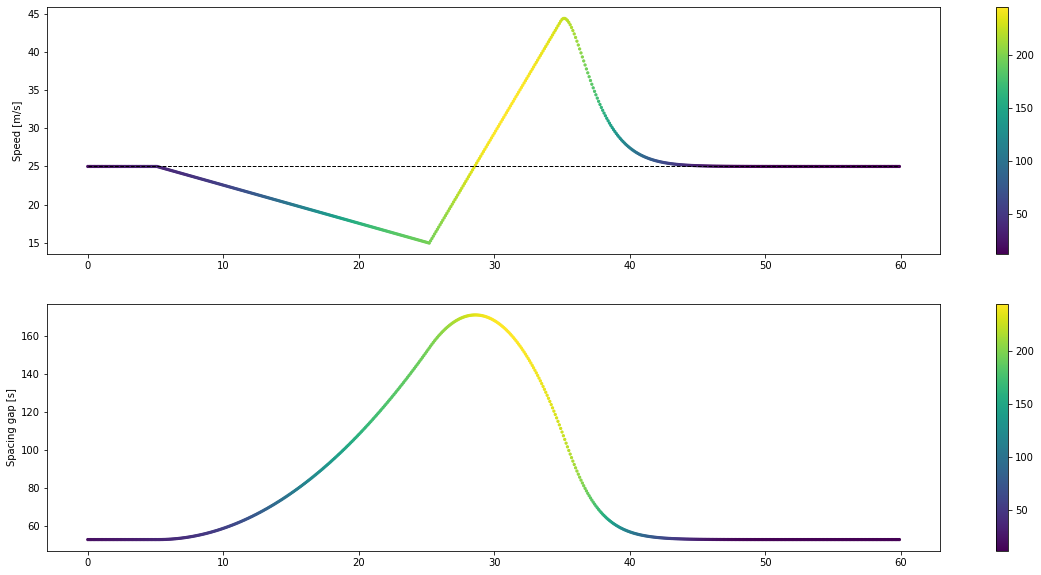

In [39]:
import matplotlib.pyplot as plt

Attack_Threshold = 20.0
attack_decel_rate = -0.5

num_steps = 600
v_lead_vals = np.ones(num_steps,)*25.0
dt = 0.1
times = np.arange(0,num_steps*dt,dt)



s_vals,v_vals,ds_vals,a_vals = sim_attack(v_lead_vals,
                                          Attack_Threshold = Attack_Threshold,
                                          attack_decel_rate = attack_decel_rate)


timeseries_list = [v_vals,a_vals,s_vals,ds_vals]

_,loss = sliding_window_mult_feat(model,timeseries_list)

smoothed_loss =  loss_smooth(times,loss)

plt.figure(figsize = [20,10])
plt.subplot(2,1,1)
plt.scatter(times,v_vals,c=smoothed_loss,s=5)
plt.plot(times,v_lead_vals,'k--',linewidth = 1.0)
plt.colorbar()
plt.ylabel('Speed [m/s]')
plt.subplot(2,1,2)
plt.scatter(times,s_vals,c=smoothed_loss,s=5)
plt.ylabel('Spacing gap [s]')
plt.colorbar()

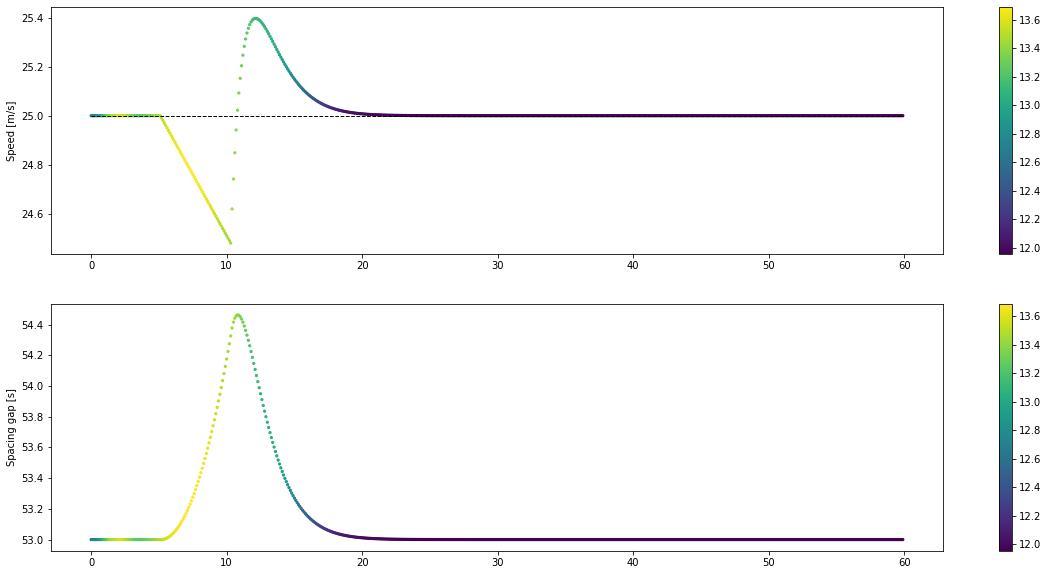

In [44]:
import matplotlib.pyplot as plt

Attack_Threshold = 5.0
attack_decel_rate = -0.1

num_steps = 600
v_lead_vals = np.ones(num_steps,)*25.0
dt = 0.1
times = np.arange(0,num_steps*dt,dt)



s_vals,v_vals,ds_vals,a_vals = sim_attack(v_lead_vals,
                                          Attack_Threshold = Attack_Threshold,
                                          attack_decel_rate = attack_decel_rate)


timeseries_list = [v_vals,a_vals,s_vals,ds_vals]

_,loss = sliding_window_mult_feat(model,timeseries_list)

smoothed_loss =  loss_smooth(times,loss)

plt.figure(figsize = [20,10])
plt.subplot(2,1,1)
plt.scatter(times,v_vals,c=smoothed_loss,s=5)
plt.plot(times,v_lead_vals,'k--',linewidth = 1.0)
plt.colorbar()
plt.ylabel('Speed [m/s]')
plt.subplot(2,1,2)
plt.scatter(times,s_vals,c=smoothed_loss,s=5)
plt.ylabel('Spacing gap [s]')
plt.colorbar()

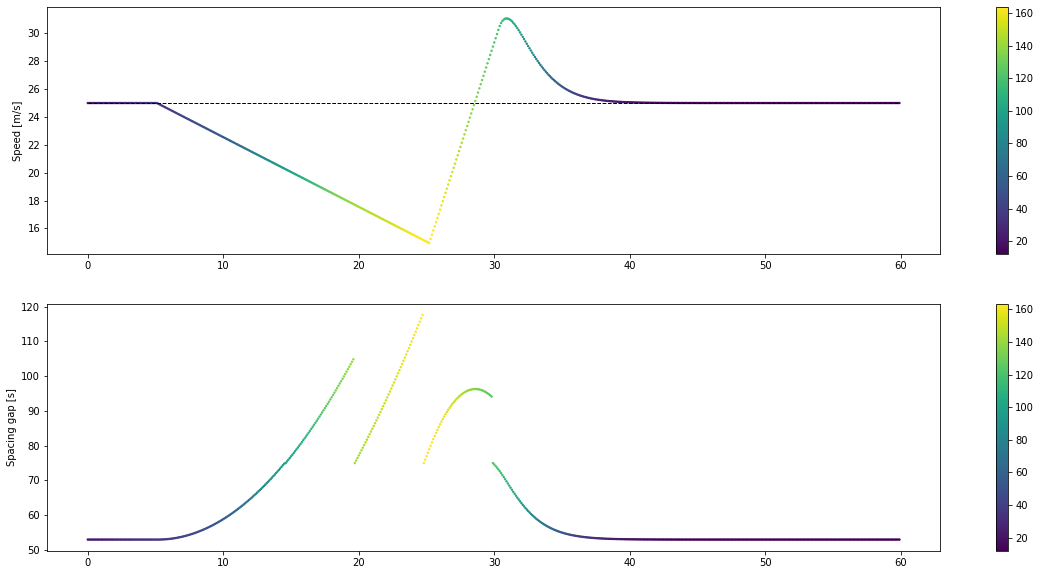

In [47]:
import analyze_detector_utils
reload(analyze_detector_utils)

from analyze_detector_utils import sim_attack_with_cut_ins

Attack_Threshold = 20.0
attack_decel_rate = -0.5

num_steps = 600
v_lead_vals = np.ones(num_steps,)*25.0
dt = 0.1
times = np.arange(0,num_steps*dt,dt)



s_vals,v_vals,ds_vals,a_vals = sim_attack_with_cut_ins(v_lead_vals,
                                          Attack_Threshold = Attack_Threshold,
                                          attack_decel_rate = attack_decel_rate)


timeseries_list = [v_vals,a_vals,s_vals,ds_vals]

_,loss = sliding_window_mult_feat(model,timeseries_list)

smoothed_loss =  loss_smooth(times,loss)

plt.figure(figsize = [20,10])
plt.subplot(2,1,1)
plt.scatter(times,v_vals,c=smoothed_loss,s=2)
plt.plot(times,v_lead_vals,'k--',linewidth = 1.0)
plt.colorbar()
plt.ylabel('Speed [m/s]')
plt.subplot(2,1,2)
plt.scatter(times,s_vals,c=smoothed_loss,s=2)
plt.ylabel('Spacing gap [s]')
plt.colorbar()

## What about the detection model trained at 1200 veh/hr?

In [49]:
model = get_cnn_lstm_ae_model(n_features=4)
# Load in a trained model:
MODEL_PATH = os.path.join(os.getcwd(),'models/cnn_lstm_ae_i24_inflow_1200_detection_model.pt')
model.load_state_dict(torch.load(MODEL_PATH,map_location=torch.device('cpu')))
print('Loaded model for detection at 1200 veh/hr')

Loaded model for detection at 1200 veh/hr


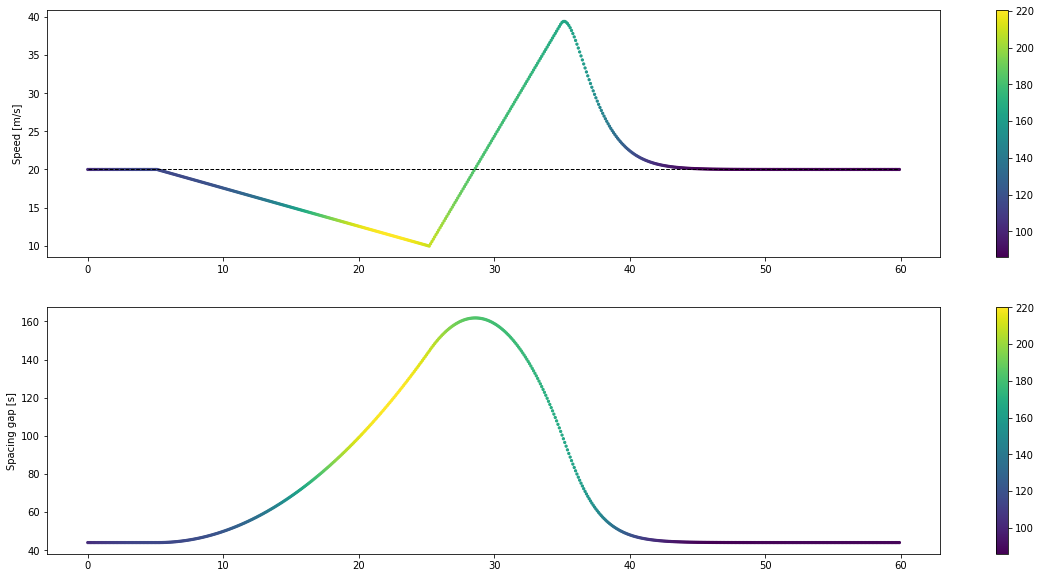

In [53]:
Attack_Threshold = 20.0
attack_decel_rate = -0.5

num_steps = 600
v_lead_vals = np.ones(num_steps,)*20.0
dt = 0.1
times = np.arange(0,num_steps*dt,dt)



s_vals,v_vals,ds_vals,a_vals = sim_attack(v_lead_vals,
                                          Attack_Threshold = Attack_Threshold,
                                          attack_decel_rate = attack_decel_rate)


timeseries_list = [v_vals,a_vals,s_vals,ds_vals]

_,loss = sliding_window_mult_feat(model,timeseries_list)

smoothed_loss =  loss_smooth(times,loss)

plt.figure(figsize = [20,10])
plt.subplot(2,1,1)
plt.scatter(times,v_vals,c=smoothed_loss,s=5)
plt.plot(times,v_lead_vals,'k--',linewidth = 1.0)
plt.colorbar()
plt.ylabel('Speed [m/s]')
plt.subplot(2,1,2)
plt.scatter(times,s_vals,c=smoothed_loss,s=5)
plt.ylabel('Spacing gap [s]')
plt.colorbar()

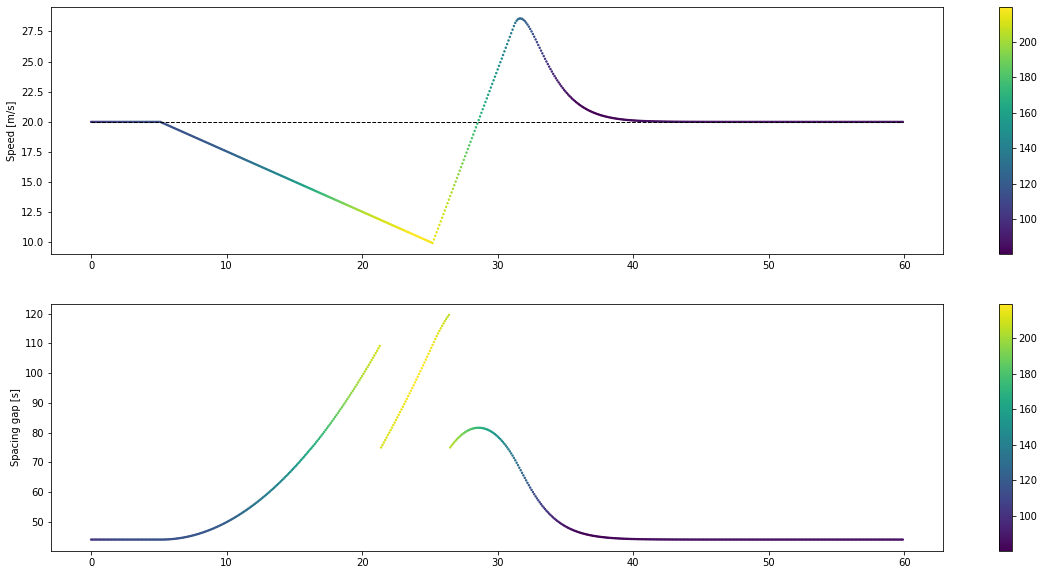

In [54]:
Attack_Threshold = 20.0
attack_decel_rate = -0.5

num_steps = 600
v_lead_vals = np.ones(num_steps,)*20.0
dt = 0.1
times = np.arange(0,num_steps*dt,dt)



s_vals,v_vals,ds_vals,a_vals = sim_attack_with_cut_ins(v_lead_vals,
                                          Attack_Threshold = Attack_Threshold,
                                          attack_decel_rate = attack_decel_rate)


timeseries_list = [v_vals,a_vals,s_vals,ds_vals]

_,loss = sliding_window_mult_feat(model,timeseries_list)

smoothed_loss =  loss_smooth(times,loss)

plt.figure(figsize = [20,10])
plt.subplot(2,1,1)
plt.scatter(times,v_vals,c=smoothed_loss,s=2)
plt.plot(times,v_lead_vals,'k--',linewidth = 1.0)
plt.colorbar()
plt.ylabel('Speed [m/s]')
plt.subplot(2,1,2)
plt.scatter(times,s_vals,c=smoothed_loss,s=2)
plt.ylabel('Spacing gap [s]')
plt.colorbar()